In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import pdist, squareform
import math 

# signal data set

In [3]:
path = "C:/Users/Bruna/OneDrive/Documentos/PhD-Kessel/application/datasets_suggestions/"
file = "train_clean_removed_drift_noise.csv"
df = pd.read_csv(path+file, sep=',')
df

,time,signal,open_channels
0,0.0001,-2.760000,0
1,0.0002,-2.855700,0
2,0.0003,-2.407400,0
3,0.0004,-3.140400,0
4,0.0005,-3.152500,0
...,...,...,...
4999995,499.9996,2.932577,7
4999996,499.9997,2.711208,7
4999997,499.9998,4.529640,8
4999998,499.9999,5.652972,9


# data preprocessing

In [28]:
df = df.drop_duplicates()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000000 entries, 0 to 4999999
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           float64
 1   signal         float64
 2   open_channels  int64  
dtypes: float64(2), int64(1)
memory usage: 152.6 MB


# Convergence assessment

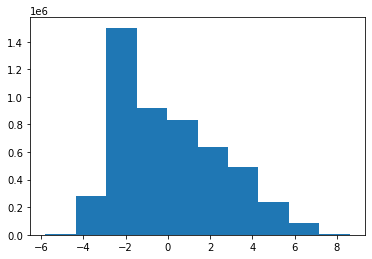

In [11]:
plt.hist(df['signal'])
plt.show()

It looks like is converging to values between -3 and -2, let us use observable distance to check.

In [31]:
df_lim = df[(df['signal']>=(-3)) & (df['signal']<=(-2))]

# Geometric data sets

Let us get the geometric data set associated to df and df_lim through distance as features.

In [36]:
df = df.set_index(['time'])
df_lim = df_lim.set_index(['time'])

Consider the normalizing counting measure over df and df_lim

# Observable distance computing

Due to the fact the data set is too big, I'll have a look on the biggest distance in df, df_lim. Note that the smallest distance is 0, so there is no need to compute it.

In [87]:
max_lim = df_lim[df['signal'] == df_lim['signal'].max()]
min_lim = df_lim[df['signal'] == df_lim['signal'].min()]
max_lim = max_lim.append(min_lim)
dist_lim = pdist(max_lim.values, metric='euclidean')
dist_lim.max()

<ipython-input-87-ce4c316db34e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  max_lim = df_lim[df['signal'] == df_lim['signal'].max()]
<ipython-input-87-ce4c316db34e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  min_lim = df_lim[df['signal'] == df_lim['signal'].min()]


1.4142135623730951

We know that the normalizing counting measure u_lim of df_lim is the set of values {2^n: n = (0,1,..., #df_lim)}. 
In the range of possible values in the set of measures u_lim the unique value that satisfies |f(s)-g(s)|>=E, given f,g features of df_lim and E \in u_lim is 1. Let us find #{s \in df_lim : |f(s)-g(s)|>=1}

In [83]:
max_df = df[df['signal'] == df['signal'].max()]
min_df = df[df['signal'] == df['signal'].min()]
max_df = max_df.append(min_df)
dist_df = pdist(max_df.values, metric='euclidean')
dist_df

array([17.53957161])

The same logic is used to df, so we have to find out #{s \in df : |f(s)-g(s)|>=16}. note that 16 is the smallest value in u_df that satisfies the inequality.